# Análisis Exploratorio de Datos Climáticos para Agricultura

## Estudio del Impacto Climático en la Agricultura Española

### Objetivos del Análisis:
1. **Caracterización climática**: Identificar patrones de temperatura, precipitación y otros factores climáticos
2. **Zonificación agroclimática**: Definir zonas con características similares para diferentes cultivos
3. **Análisis de riesgos**: Identificar eventos extremos que afecten la agricultura
4. **Tendencias temporales**: Evaluar cambios climáticos a largo plazo
5. **Índices agroclimáticos**: Calcular indicadores específicos para la agricultura

---

## 1. Importación de Librerías y Configuración

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización para matplotlib (por si se necesita)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Configuración de Plotly
import plotly.io as pio
pio.renderers.default = "browser"  # Para mostrar en navegador si es necesario

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Librerías importadas correctamente")
print("✓ Plotly configurado para gráficos interactivos")
print("✓ Pandas configurado para visualización completa")

✓ Librerías importadas correctamente
✓ Plotly configurado para gráficos interactivos
✓ Pandas configurado para visualización completa


## 2. Carga y Exploración Inicial de los Datos

In [2]:
# Cargar los datos climáticos limpios
clima_df = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\Clima_Spain\Data\Base de datos\clima_limpio.csv')

# Convertir DATE a datetime
clima_df['DATE'] = pd.to_datetime(clima_df['DATE'])

# Información básica del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Dimensiones: {clima_df.shape}")
print(f"Período de datos: {clima_df['DATE'].min()} a {clima_df['DATE'].max()}")
print(f"Número de estaciones: {clima_df['STATION'].nunique()}")
print(f"Años de datos: {clima_df['DATE'].dt.year.nunique()}")

clima_df.head()

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones: (1619312, 19)
Período de datos: 1901-01-01 00:00:00 a 2025-07-13 00:00:00
Número de estaciones: 88
Años de datos: 125


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TEMPERATURA_MEDIA,TMAX_C,TMIN_C
0,SP000006155,1942-05-01,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",9.0,",,E",0.0,",,E",230.0,",,E",156.0,",,E",0.0,",,E",193.0,23.0,15.6
1,SP000006155,1942-05-02,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",255.0,",,E",145.0,",,E",0.0,",,E",200.0,25.5,14.5
2,SP000006155,1942-05-03,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",185.0,",,E",128.0,",,E",0.0,",,E",156.5,18.5,12.8
3,SP000006155,1942-05-04,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",186.0,",,E",102.0,",,E",0.0,",,E",144.0,18.6,10.2
4,SP000006155,1942-05-05,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",0.0,",,E",0.0,",,E",186.0,",,E",119.0,",,E",0.0,",,E",152.5,18.6,11.9


In [3]:
# Información detallada de las variables
print("=== INFORMACIÓN DE LAS VARIABLES ===")
print(clima_df.info())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
clima_df.describe()

=== INFORMACIÓN DE LAS VARIABLES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619312 entries, 0 to 1619311
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   STATION            1619312 non-null  object        
 1   DATE               1619312 non-null  datetime64[ns]
 2   LATITUDE           1619312 non-null  float64       
 3   LONGITUDE          1619312 non-null  float64       
 4   ELEVATION          1619312 non-null  float64       
 5   NAME               1619312 non-null  object        
 6   PRCP               1619312 non-null  float64       
 7   PRCP_ATTRIBUTES    1619312 non-null  object        
 8   SNWD               1619312 non-null  float64       
 9   SNWD_ATTRIBUTES    1619312 non-null  object        
 10  TMAX               1619312 non-null  float64       
 11  TMAX_ATTRIBUTES    1619312 non-null  object        
 12  TMIN               1619312 non-null  float64   

,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TMAX,TMIN,TAVG,TEMPERATURA_MEDIA,TMAX_C,TMIN_C
count,1619312,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06,1.619312e+06
mean,1988-12-04 15:08:02.178109824,3.973668e+01,-4.573825e+00,4.714559e+02,1.787636e+01,9.048960e-01,1.966606e+02,9.199206e+01,8.558080e+01,1.443263e+02,1.966606e+01,9.199206e+00
min,1901-01-01 00:00:00,2.830890e+01,-1.775500e+01,1.000000e+00,0.000000e+00,0.000000e+00,-1.910000e+02,-9.990000e+02,-1.390000e+02,-4.995000e+02,-1.910000e+01,-9.990000e+01
25%,1971-11-12 18:00:00,3.784420e+01,-6.256700e+00,4.330000e+01,0.000000e+00,0.000000e+00,1.400000e+02,4.200000e+01,0.000000e+00,9.350000e+01,1.400000e+01,4.200000e+00
50%,1992-02-08 00:00:00,4.110390e+01,-3.831400e+00,3.530000e+02,0.000000e+00,0.000000e+00,1.950000e+02,9.400000e+01,6.600000e+01,1.440000e+02,1.950000e+01,9.400000e+00
75%,2010-09-21 00:00:00,4.235580e+01,-1.863100e+00,6.870000e+02,2.000000e+00,0.000000e+00,2.550000e+02,1.440000e+02,1.630000e+02,1.970000e+02,2.550000e+01,1.440000e+01
max,2025-07-13 00:00:00,4.356670e+01,3.181700e+00,2.451000e+03,3.600000e+03,2.499000e+03,4.720000e+02,3.320000e+02,4.050000e+02,3.725000e+02,4.720000e+01,3.320000e+01
std,NaN,4.055896e+00,4.683389e+00,5.225629e+02,6.022845e+01,2.472597e+01,8.139397e+01,6.741668e+01,9.161103e+01,7.045844e+01,8.139397e+00,6.741668e+00


## 3. Procesamiento de Datos para Análisis Agrícola

In [4]:
# Crear variables derivadas importantes para agricultura
clima_df['YEAR'] = clima_df['DATE'].dt.year
clima_df['MONTH'] = clima_df['DATE'].dt.month
clima_df['DAY_OF_YEAR'] = clima_df['DATE'].dt.dayofyear
clima_df['SEASON'] = clima_df['MONTH'].map({
    12: 'Invierno', 1: 'Invierno', 2: 'Invierno',
    3: 'Primavera', 4: 'Primavera', 5: 'Primavera',
    6: 'Verano', 7: 'Verano', 8: 'Verano',
    9: 'Otoño', 10: 'Otoño', 11: 'Otoño'
})

# Convertir temperaturas de décimos de grado a grados Celsius
clima_df['TMAX_C'] = clima_df['TMAX'] / 10
clima_df['TMIN_C'] = clima_df['TMIN'] / 10
clima_df['TAVG_C'] = clima_df['TAVG'] / 10

# Rango térmico diario (importante para muchos cultivos)
clima_df['TEMP_RANGE'] = clima_df['TMAX_C'] - clima_df['TMIN_C']

# Precipitación en mm (ya está en décimos de mm, convertir a mm)
clima_df['PRCP_MM'] = clima_df['PRCP'] / 10

# Nieve en mm
clima_df['SNWD_MM'] = clima_df['SNWD']

print("Variables agroclimáticas creadas:")
print("- TMAX_C, TMIN_C, TAVG_C: Temperaturas en °C")
print("- TEMP_RANGE: Rango térmico diario")
print("- PRCP_MM: Precipitación en mm")
print("- SEASON: Estación del año")
print("- Variables temporales: YEAR, MONTH, DAY_OF_YEAR")

Variables agroclimáticas creadas:
- TMAX_C, TMIN_C, TAVG_C: Temperaturas en °C
- TEMP_RANGE: Rango térmico diario
- PRCP_MM: Precipitación en mm
- SEASON: Estación del año
- Variables temporales: YEAR, MONTH, DAY_OF_YEAR


## 4. Índices Agroclimáticos Especializados

In [5]:
def calculate_agricultural_indices(df):
    """
    Calcula índices agroclimáticos importantes
    """
    # Grados día de crecimiento (GDD) - Base 10°C
    df['GDD_10'] = np.maximum(0, df['TAVG_C'] - 10)
    
    # Grados día de crecimiento - Base 5°C (para cultivos de clima frío)
    df['GDD_5'] = np.maximum(0, df['TAVG_C'] - 5)
    
    # Días con heladas (temperatura mínima <= 0°C)
    df['FROST_DAY'] = (df['TMIN_C'] <= 0).astype(int)
    
    # Días con calor extremo (temperatura máxima >= 35°C)
    df['HEAT_STRESS_DAY'] = (df['TMAX_C'] >= 35).astype(int)
    
    # Días secos (precipitación = 0)
    df['DRY_DAY'] = (df['PRCP_MM'] == 0).astype(int)
    
    # Días con lluvia significativa (>= 1mm)
    df['RAIN_DAY'] = (df['PRCP_MM'] >= 1).astype(int)
    
    # Días con lluvia intensa (>= 10mm)
    df['HEAVY_RAIN_DAY'] = (df['PRCP_MM'] >= 10).astype(int)
    
    # Índice de estrés térmico (temperatura máxima - temperatura óptima)
    # Asumiendo temperatura óptima de 25°C para muchos cultivos
    df['HEAT_STRESS_INDEX'] = np.maximum(0, df['TMAX_C'] - 25)
    
    # Índice de frío (temperatura mínima por debajo de 5°C)
    df['COLD_STRESS_INDEX'] = np.maximum(0, 5 - df['TMIN_C'])
    
    return df

# Aplicar el cálculo de índices
clima_df = calculate_agricultural_indices(clima_df)

print("Índices agroclimáticos calculados:")
print("- GDD_10, GDD_5: Grados día de crecimiento")
print("- FROST_DAY: Días con heladas")
print("- HEAT_STRESS_DAY: Días con calor extremo")
print("- RAIN_DAY, HEAVY_RAIN_DAY: Días con lluvia")
print("- HEAT_STRESS_INDEX, COLD_STRESS_INDEX: Índices de estrés")

clima_df[['DATE', 'TMAX_C', 'TMIN_C', 'TAVG_C', 'PRCP_MM', 'GDD_10', 'FROST_DAY']].head()

Índices agroclimáticos calculados:
- GDD_10, GDD_5: Grados día de crecimiento
- FROST_DAY: Días con heladas
- HEAT_STRESS_DAY: Días con calor extremo
- RAIN_DAY, HEAVY_RAIN_DAY: Días con lluvia
- HEAT_STRESS_INDEX, COLD_STRESS_INDEX: Índices de estrés


,DATE,TMAX_C,TMIN_C,TAVG_C,PRCP_MM,GDD_10,FROST_DAY
0,1942-05-01,23.0,15.6,0.0,0.9,0.0,0
1,1942-05-02,25.5,14.5,0.0,0.0,0.0,0
2,1942-05-03,18.5,12.8,0.0,0.0,0.0,0
3,1942-05-04,18.6,10.2,0.0,0.0,0.0,0
4,1942-05-05,18.6,11.9,0.0,0.0,0.0,0


## 5. Análisis de Distribución Geográfica de las Estaciones

In [6]:
# Información geográfica de las estaciones
stations_info = clima_df.groupby('STATION').agg({
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'ELEVATION': 'first',
    'NAME': 'first',
    'DATE': ['min', 'max', 'count']
}).reset_index()

stations_info.columns = ['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 
                        'DATE_START', 'DATE_END', 'TOTAL_RECORDS']

print(f"Total de estaciones meteorológicas: {len(stations_info)}")
print(f"\nDistribución por elevación:")
print(f"Mínima: {stations_info['ELEVATION'].min():.0f} m")
print(f"Máxima: {stations_info['ELEVATION'].max():.0f} m")
print(f"Media: {stations_info['ELEVATION'].mean():.0f} m")

stations_info.head()

Total de estaciones meteorológicas: 88

Distribución por elevación:
Mínima: 1 m
Máxima: 2451 m
Media: 478 m


,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,DATE_START,DATE_END,TOTAL_RECORDS
0,SP000006155,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",1942-05-01,2025-07-13,30160
1,SP000008027,43.3075,-2.0392,251.0,"SAN SEBASTIAN IGUELDO, SP",1916-04-01,2025-07-07,36136
2,SP000008181,41.2928,2.0697,4.0,"BARCELONA AEROPUERTO, SP",1924-03-01,2025-07-11,31631
3,SP000008202,40.9592,-5.4981,790.0,"SALAMANCA AEROPUERTO, SP",1945-01-01,2025-07-13,29344
4,SP000008215,40.7806,-4.0103,1894.0,"NAVACERRADA, SP",1946-01-01,2025-07-13,28784


In [7]:
# Mapa de distribución de estaciones
fig = px.scatter_mapbox(
    stations_info,
    lat='LATITUDE',
    lon='LONGITUDE',
    color='ELEVATION',
    size='TOTAL_RECORDS',
    hover_name='NAME',
    hover_data={'STATION': True, 'ELEVATION': True, 'TOTAL_RECORDS': True},
    color_continuous_scale='viridis',
    title='Distribución Geográfica de Estaciones Meteorológicas en España',
    mapbox_style='open-street-map',
    height=600,
    zoom=5
)

fig.update_layout(
    title_font_size=16,
    coloraxis_colorbar=dict(title="Elevación (m)")
)

fig.show()

# Estadísticas geográficas
print(f"\nCobertura geográfica:")
print(f"Latitud: {stations_info['LATITUDE'].min():.2f}° a {stations_info['LATITUDE'].max():.2f}°")
print(f"Longitud: {stations_info['LONGITUDE'].min():.2f}° a {stations_info['LONGITUDE'].max():.2f}°")


Cobertura geográfica:
Latitud: 28.31° a 43.57°
Longitud: -17.75° a 3.18°


## 6. Análisis Temporal de Variables Climáticas

In [32]:
# Resumen anual de variables climáticas
annual_climate = clima_df.groupby('YEAR').agg({
    'TMAX_C': 'mean',
    'TMIN_C': 'mean',
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'TEMP_RANGE': 'mean',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum',
    'RAIN_DAY': 'sum'
}).reset_index()

print("Tendencias anuales calculadas")
annual_climate.head()

Tendencias anuales calculadas


,YEAR,TMAX_C,TMIN_C,TAVG_C,PRCP_MM,TEMP_RANGE,GDD_10,FROST_DAY,HEAT_STRESS_DAY,RAIN_DAY
0,1901,20.067857,8.585440,0.0,0.0,11.482418,0.0,53,12,0
1,1902,16.977348,5.558011,0.0,0.0,11.419337,0.0,36,0,0
2,1903,22.904348,9.111413,0.0,0.0,13.792935,0.0,26,21,0
3,1904,20.202186,7.690437,0.0,0.0,12.511749,0.0,53,21,0
4,1905,21.330441,8.578237,0.0,348.4,12.752204,0.0,87,32,44


In [9]:
# Gráfico de tendencias anuales
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperatura Media Anual', 'Precipitación Total Anual', 
                   'Grados Día de Crecimiento', 'Días con Heladas'),
    vertical_spacing=0.12
)

# Temperatura media
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['TAVG_C'],
               mode='lines+markers', name='Temp. Media',
               line=dict(color='red', width=2)),
    row=1, col=1
)

# Precipitación
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['PRCP_MM'],
               mode='lines+markers', name='Precipitación',
               line=dict(color='blue', width=2)),
    row=1, col=2
)

# Grados día
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['GDD_10'],
               mode='lines+markers', name='GDD-10',
               line=dict(color='green', width=2)),
    row=2, col=1
)

# Días con heladas
fig.add_trace(
    go.Scatter(x=annual_climate['YEAR'], y=annual_climate['FROST_DAY'],
               mode='lines+markers', name='Días Heladas',
               line=dict(color='purple', width=2)),
    row=2, col=2
)

fig.update_layout(
    height=600,
    title_text="Tendencias Climáticas Anuales - Impacto en Agricultura",
    showlegend=False
)

fig.update_yaxes(title_text="°C", row=1, col=1)
fig.update_yaxes(title_text="mm", row=1, col=2)
fig.update_yaxes(title_text="GDD", row=2, col=1)
fig.update_yaxes(title_text="Días", row=2, col=2)

fig.show()

## 7. Análisis Estacional para Agricultura

In [10]:
# Análisis por estaciones del año
seasonal_analysis = clima_df.groupby('SEASON').agg({
    'TMAX_C': ['mean', 'std', 'min', 'max'],
    'TMIN_C': ['mean', 'std', 'min', 'max'],
    'TAVG_C': ['mean', 'std'],
    'PRCP_MM': ['mean', 'sum', 'std'],
    'TEMP_RANGE': 'mean',
    'GDD_10': ['mean', 'sum'],
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum',
    'RAIN_DAY': 'sum'
})

print("=== ANÁLISIS ESTACIONAL ===")
print("Importante para planificación de cultivos y calendarios agrícolas")
seasonal_analysis

=== ANÁLISIS ESTACIONAL ===
Importante para planificación de cultivos y calendarios agrícolas


TMAX_C                           TMIN_C                        \
                mean       std   min   max       mean       std   min   max   
SEASON                                                                        
Invierno   12.399834  5.303330 -19.1  38.6   3.743084  5.384053 -99.9  23.4   
Otoño      20.386501  6.808204 -10.9  45.4  10.255006  5.937284 -99.9  28.9   
Primavera  18.207132  6.051650 -13.9  42.6   7.539972  5.078350 -99.9  28.5   
Verano     27.615757  5.966565  -2.3  47.2  15.228932  4.696678 -99.9  33.2   

              TAVG_C              PRCP_MM                     TEMP_RANGE  \
                mean        std      mean       sum       std       mean   
SEASON                                                                     
Invierno    4.923420   5.630906  2.216530  889006.0  6.554168   8.656750   
Otoño       8.967333   9.006051  2.191860  881303.0  7.314192  10.131495   
Primavera   7.717980   7.687768  1.868977  767465.6  5.553360  10.667160   
Verano     12.597875  11.542828  0.880273  356966.5  4.113188  12.386825   

             GDD_10            FROST_DAY HEAT_STRESS_DAY RAIN_DAY  
               mean        sum       sum             sum      sum  
SEASON                                                             
Invierno   0.756205   303298.6    113011               5    97982  
Otoño      3.627477  1458535.8     27437            3157    86251  
Primavera  2.425748   996094.8     38692             611    95840  
Verano     6.947862  2817482.9      8272           41873    44483

In [33]:
# Gráficos estacionales interactivos
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperaturas Medias por Estación', 'Precipitación Total por Estación', 
                   'Grados Día de Crecimiento por Estación', 'Eventos Extremos por Estación'),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Datos para temperaturas por estación
season_temp = clima_df.groupby('SEASON')[['TMAX_C', 'TMIN_C', 'TAVG_C']].mean().reset_index()

# Temperatura por estación
for i, temp_type in enumerate(['TMAX_C', 'TMIN_C', 'TAVG_C']):
    colors = ['red', 'blue', 'green']
    names = ['Temp. Máxima', 'Temp. Mínima', 'Temp. Media']
    fig.add_trace(
        go.Bar(x=season_temp['SEASON'], y=season_temp[temp_type], 
               name=names[i], marker_color=colors[i],
               showlegend=True if i < 3 else False),
        row=1, col=1
    )

# Precipitación por estación
season_prcp = clima_df.groupby('SEASON')['PRCP_MM'].sum().reset_index()
fig.add_trace(
    go.Bar(x=season_prcp['SEASON'], y=season_prcp['PRCP_MM'], 
           name='Precipitación', marker_color='skyblue',
           showlegend=False),
    row=1, col=2
)

# Grados día por estación
season_gdd = clima_df.groupby('SEASON')['GDD_10'].sum().reset_index()
fig.add_trace(
    go.Bar(x=season_gdd['SEASON'], y=season_gdd['GDD_10'], 
           name='GDD-10', marker_color='orange',
           showlegend=False),
    row=2, col=1
)

# Eventos extremos por estación
season_events = clima_df.groupby('SEASON')[['FROST_DAY', 'HEAT_STRESS_DAY']].sum().reset_index()
fig.add_trace(
    go.Bar(x=season_events['SEASON'], y=season_events['FROST_DAY'], 
           name='Días Heladas', marker_color='purple'),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=season_events['SEASON'], y=season_events['HEAT_STRESS_DAY'], 
           name='Días Calor Extremo', marker_color='red'),
    row=2, col=2
)

# Actualizar layout
fig.update_layout(
    height=700,
    title_text="Análisis Estacional Interactivo - Variables Agroclimáticas",
    title_font_size=16,
    showlegend=True
)

# Actualizar ejes
fig.update_yaxes(title_text="Temperatura (°C)", row=1, col=1)
fig.update_yaxes(title_text="Precipitación (mm)", row=1, col=2)
fig.update_yaxes(title_text="GDD-10", row=2, col=1)
fig.update_yaxes(title_text="Número de Días", row=2, col=2)

fig.show()

## 8. Análisis Mensual - Calendario Agrícola

In [12]:
# Análisis mensual para calendario agrícola
monthly_climate = clima_df.groupby('MONTH').agg({
    'TMAX_C': 'mean',
    'TMIN_C': 'mean',
    'TAVG_C': 'mean',
    'PRCP_MM': 'mean',
    'GDD_10': 'mean',
    'FROST_DAY': lambda x: (x.sum() / len(clima_df.groupby('MONTH')) * 100),  # % de días con heladas
    'HEAT_STRESS_DAY': lambda x: (x.sum() / len(clima_df.groupby('MONTH')) * 100),  # % de días calurosos
    'RAIN_DAY': lambda x: (x.sum() / len(clima_df.groupby('MONTH')) * 100)  # % de días lluviosos
}).reset_index()

monthly_climate['MONTH_NAME'] = monthly_climate['MONTH'].map({
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
})

print("=== CALENDARIO AGROCLIMÁTICO MENSUAL ===")
monthly_climate

=== CALENDARIO AGROCLIMÁTICO MENSUAL ===


,MONTH,TMAX_C,TMIN_C,TAVG_C,PRCP_MM,GDD_10,FROST_DAY,HEAT_STRESS_DAY,RAIN_DAY,MONTH_NAME
0,1,11.735219,3.280334,4.549639,2.193902,0.627085,356650.000000,0.000000,280191.666667,Enero
1,2,13.228729,3.778788,5.244174,2.058897,0.805441,292183.333333,41.666667,254208.333333,Febrero
2,3,15.703882,5.422418,6.384350,1.949149,1.399609,181616.666667,8.333333,270708.333333,Marzo
3,4,17.733124,7.161139,7.452244,1.963977,2.130274,94525.000000,233.333333,278041.666667,Abril
4,5,21.179398,10.032834,9.314270,1.696478,3.742131,46291.666667,4850.000000,249916.666667,Mayo
5,6,25.380527,13.498766,11.544027,1.192664,5.898005,26816.666667,50125.000000,165875.000000,Junio
6,7,28.725428,15.991852,13.134907,0.634447,7.472025,20900.000000,157525.000000,95600.000000,Julio
7,8,28.686724,16.153967,13.088946,0.821382,7.447911,21216.666667,141291.666667,109216.666667,Agosto
8,9,25.308583,13.797701,11.402401,1.513494,5.784121,25700.000000,25466.666667,172033.333333,Septiembre
9,10,20.584344,10.464420,9.056517,2.355505,3.556100,48591.666667,841.666667,259641.666667,Octubre


In [34]:
# Heatmap interactivo del calendario agroclimático
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Calendario de Temperaturas y Precipitación', 'Calendario de Índices Agroclimáticos'),
    vertical_spacing=0.15,
    specs=[[{"type": "heatmap"}], [{"type": "heatmap"}]]
)

# Preparar datos para temperatura y precipitación
temp_prcp_data = monthly_climate[['MONTH_NAME', 'TMAX_C', 'TMIN_C', 'PRCP_MM']].set_index('MONTH_NAME')
months = temp_prcp_data.index.tolist()

# Heatmap 1: Temperaturas y Precipitación
fig.add_trace(
    go.Heatmap(
        z=[temp_prcp_data['TMAX_C'].values, temp_prcp_data['TMIN_C'].values, temp_prcp_data['PRCP_MM'].values],
        x=months,
        y=['Temp. Máxima (°C)', 'Temp. Mínima (°C)', 'Precipitación (mm)'],
        colorscale='RdYlBu_r',
        text=[[f'{val:.1f}' for val in temp_prcp_data['TMAX_C'].values],
              [f'{val:.1f}' for val in temp_prcp_data['TMIN_C'].values],
              [f'{val:.1f}' for val in temp_prcp_data['PRCP_MM'].values]],
        texttemplate="%{text}",
        textfont={"size": 10},
        colorbar=dict(title="Valor", x=1.02, len=0.4, y=0.75),
        name="Temp/Precip"
    ),
    row=1, col=1
)

# Preparar datos para índices agrícolas
agri_data = monthly_climate[['MONTH_NAME', 'GDD_10', 'FROST_DAY', 'HEAT_STRESS_DAY']].set_index('MONTH_NAME')

# Heatmap 2: Índices Agroclimáticos
fig.add_trace(
    go.Heatmap(
        z=[agri_data['GDD_10'].values, agri_data['FROST_DAY'].values, agri_data['HEAT_STRESS_DAY'].values],
        x=months,
        y=['GDD-10', 'Días Heladas (%)', 'Días Calor Extremo (%)'],
        colorscale='viridis',
        text=[[f'{val:.1f}' for val in agri_data['GDD_10'].values],
              [f'{val:.1f}' for val in agri_data['FROST_DAY'].values],
              [f'{val:.1f}' for val in agri_data['HEAT_STRESS_DAY'].values]],
        texttemplate="%{text}",
        textfont={"size": 10},
        colorbar=dict(title="Valor", x=1.02, len=0.4, y=0.25),
        name="Índices Agríc."
    ),
    row=2, col=1
)

# Actualizar layout
fig.update_layout(
    height=800,
    title_text="Calendario Agroclimático Interactivo - España",
    title_font_size=16,
    showlegend=False
)

fig.show()

## 9. Zonificación Agroclimática

In [14]:
# Crear perfiles climáticos por estación para zonificación
station_profiles = clima_df.groupby('STATION').agg({
    'LATITUDE': 'first',
    'LONGITUDE': 'first',
    'ELEVATION': 'first',
    'NAME': 'first',
    'TMAX_C': 'mean',
    'TMIN_C': 'mean',
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'TEMP_RANGE': 'mean',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum'
}).reset_index()

# Clasificación climática simple basada en temperatura y precipitación
def classify_climate(row):
    temp_avg = row['TAVG_C']
    precip_annual = row['PRCP_MM']
    
    if temp_avg < 10:
        if precip_annual < 600:
            return 'Frío-Seco'
        else:
            return 'Frío-Húmedo'
    elif temp_avg < 18:
        if precip_annual < 600:
            return 'Templado-Seco'
        else:
            return 'Templado-Húmedo'
    else:
        if precip_annual < 600:
            return 'Cálido-Seco'
        else:
            return 'Cálido-Húmedo'

station_profiles['CLIMATE_ZONE'] = station_profiles.apply(classify_climate, axis=1)

print("=== ZONIFICACIÓN AGROCLIMÁTICA ===")
print(station_profiles['CLIMATE_ZONE'].value_counts())
station_profiles.head()

=== ZONIFICACIÓN AGROCLIMÁTICA ===
CLIMATE_ZONE
Frío-Húmedo        57
Templado-Húmedo    26
Cálido-Húmedo       4
Frío-Seco           1
Name: count, dtype: int64


,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX_C,TMIN_C,TAVG_C,PRCP_MM,TEMP_RANGE,GDD_10,FROST_DAY,HEAT_STRESS_DAY,CLIMATE_ZONE
0,SP000006155,36.6667,-4.4881,7.0,"MALAGA AEROPUERTO, SP",23.160600,13.734708,11.532775,43955.9,9.425892,157882.8,96,819,Templado-Húmedo
1,SP000008027,43.3075,-2.0392,251.0,"SAN SEBASTIAN IGUELDO, SP",16.315378,10.341969,6.943336,154456.1,5.973409,78026.5,1161,55,Frío-Húmedo
2,SP000008181,41.2928,2.0697,4.0,"BARCELONA AEROPUERTO, SP",20.016819,11.548095,9.654766,54047.5,8.468724,122341.8,1219,18,Frío-Húmedo
3,SP000008202,40.9592,-5.4981,790.0,"SALAMANCA AEROPUERTO, SP",18.644415,5.526183,7.914712,30437.3,13.118232,79319.6,6430,601,Frío-Húmedo
4,SP000008215,40.7806,-4.0103,1894.0,"NAVACERRADA, SP",10.557077,3.085617,4.429937,105491.9,7.471460,37998.3,10959,0,Frío-Húmedo


In [35]:
# Mapa de zonificación agroclimática
fig = px.scatter_mapbox(
    station_profiles,
    lat='LATITUDE',
    lon='LONGITUDE',
    color='CLIMATE_ZONE',
    size='GDD_10',
    hover_name='NAME',
    hover_data={'TAVG_C': ':.1f', 'PRCP_MM': ':.0f', 'ELEVATION': ':.0f'},
    title='Zonificación Agroclimática de España',
    mapbox_style='open-street-map',
    height=600,
    zoom=5,
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    title_font_size=16,
    legend=dict(title="Zona Climática")
)

fig.show()

## 10. Análisis de Eventos Extremos

In [16]:
# Análisis de eventos extremos importantes para agricultura
extreme_events = {
    'Heladas tardías (Abril-Mayo)': len(clima_df[(clima_df['MONTH'].isin([4, 5])) & (clima_df['FROST_DAY'] == 1)]),
    'Heladas tempranas (Septiembre-Octubre)': len(clima_df[(clima_df['MONTH'].isin([9, 10])) & (clima_df['FROST_DAY'] == 1)]),
    'Olas de calor (>35°C)': len(clima_df[clima_df['HEAT_STRESS_DAY'] == 1]),
    'Lluvias intensas (>20mm)': len(clima_df[clima_df['PRCP_MM'] > 20]),
    'Sequías (>30 días sin lluvia)': 'Requiere análisis secuencial',
    'Granizo (indicado en atributos)': 'Requiere análisis de atributos'
}

print("=== EVENTOS EXTREMOS RELEVANTES PARA AGRICULTURA ===")
for event, count in extreme_events.items():
    print(f"{event}: {count}")

# Análisis de temperaturas extremas por año
yearly_extremes = clima_df.groupby('YEAR').agg({
    'TMAX_C': ['min', 'max'],
    'TMIN_C': ['min', 'max'],
    'PRCP_MM': 'max',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum'
}).reset_index()

yearly_extremes.columns = ['YEAR', 'TMAX_MIN', 'TMAX_MAX', 'TMIN_MIN', 'TMIN_MAX', 
                          'MAX_DAILY_RAIN', 'TOTAL_FROST_DAYS', 'TOTAL_HEAT_DAYS']

yearly_extremes.head()

=== EVENTOS EXTREMOS RELEVANTES PARA AGRICULTURA ===
Heladas tardías (Abril-Mayo): 16898
Heladas tempranas (Septiembre-Octubre): 8915
Olas de calor (>35°C): 45646
Lluvias intensas (>20mm): 33127
Sequías (>30 días sin lluvia): Requiere análisis secuencial
Granizo (indicado en atributos): Requiere análisis de atributos


,YEAR,TMAX_MIN,TMAX_MAX,TMIN_MIN,TMIN_MAX,MAX_DAILY_RAIN,TOTAL_FROST_DAYS,TOTAL_HEAT_DAYS
0,1901,-1.3,45.0,-11.5,21.2,0.0,53,12
1,1902,-1.0,34.1,-6.5,28.5,0.0,36,0
2,1903,1.7,45.5,-7.0,19.8,0.0,26,21
3,1904,2.0,38.6,-6.6,20.1,0.0,53,21
4,1905,1.5,39.8,-99.9,23.5,29.5,87,32


In [17]:
# Gráfico interactivo de eventos extremos anuales
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Temperatura Máxima Anual', 'Temperatura Mínima Anual', 
                   'Días con Heladas por Año', 'Días con Calor Extremo por Año'),
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Temperaturas máximas extremas
fig.add_trace(
    go.Scatter(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TMAX_MAX'],
        mode='lines+markers',
        name='Temp. Máxima',
        line=dict(color='red', width=3),
        marker=dict(size=6),
        hovertemplate='Año: %{x}<br>Temp. Máxima: %{y:.1f}°C<extra></extra>'
    ),
    row=1, col=1
)

# Temperaturas mínimas extremas
fig.add_trace(
    go.Scatter(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TMIN_MIN'],
        mode='lines+markers',
        name='Temp. Mínima',
        line=dict(color='blue', width=3),
        marker=dict(size=6),
        hovertemplate='Año: %{x}<br>Temp. Mínima: %{y:.1f}°C<extra></extra>'
    ),
    row=1, col=2
)

# Días de heladas anuales
fig.add_trace(
    go.Bar(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TOTAL_FROST_DAYS'],
        name='Días Heladas',
        marker_color='purple',
        opacity=0.7,
        hovertemplate='Año: %{x}<br>Días con Heladas: %{y}<extra></extra>'
    ),
    row=2, col=1
)

# Días de calor extremo anuales
fig.add_trace(
    go.Bar(
        x=yearly_extremes['YEAR'], 
        y=yearly_extremes['TOTAL_HEAT_DAYS'],
        name='Días Calor Extremo',
        marker_color='red',
        opacity=0.7,
        hovertemplate='Año: %{x}<br>Días Calor Extremo: %{y}<extra></extra>'
    ),
    row=2, col=2
)

# Actualizar layout
fig.update_layout(
    height=700,
    title_text="Eventos Extremos Anuales - Análisis Interactivo",
    title_font_size=16,
    showlegend=False
)

# Actualizar ejes
fig.update_yaxes(title_text="°C", row=1, col=1)
fig.update_yaxes(title_text="°C", row=1, col=2)
fig.update_yaxes(title_text="Días", row=2, col=1)
fig.update_yaxes(title_text="Días", row=2, col=2)

# Añadir grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

## 11. Correlaciones Climáticas Relevantes para Agricultura

In [19]:
# Matriz de correlación interactiva
climate_vars = ['TMAX_C', 'TMIN_C', 'TAVG_C', 'PRCP_MM', 'TEMP_RANGE', 
               'GDD_10', 'ELEVATION', 'LATITUDE', 'LONGITUDE']

correlation_matrix = clima_df[climate_vars].corr()

# Crear máscara para mostrar solo la matriz triangular inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_masked = correlation_matrix.mask(mask)

# Heatmap interactivo de correlaciones
fig = go.Figure(data=go.Heatmap(
    z=correlation_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu_r',
    zmid=0,
    text=correlation_masked.round(3).values,
    texttemplate="%{text}",
    textfont={"size": 12},
    hovertemplate='%{y} vs %{x}<br>Correlación: %{z:.3f}<extra></extra>',
    colorbar=dict(title="Correlación")
))

fig.update_layout(
    title='Matriz de Correlación Interactiva - Variables Climáticas y Geográficas',
    title_font_size=16,
    width=800,
    height=700,
    xaxis_title="Variables",
    yaxis_title="Variables"
)

fig.show()

# Análisis de correlaciones fuertes
print("=== CORRELACIONES IMPORTANTES ===")
print("Correlaciones fuertes (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            strong_correlations.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j],
                'correlation': corr
            })
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr:.3f}")

# Gráfico de barras de correlaciones fuertes
if strong_correlations:
    corr_df = pd.DataFrame(strong_correlations)
    corr_df['pair'] = corr_df['var1'] + ' - ' + corr_df['var2']
    
    fig_corr = px.bar(
        corr_df, 
        x='pair', 
        y='correlation',
        title='Correlaciones Fuertes (|r| > 0.7)',
        color='correlation',
        color_continuous_scale='RdBu_r',
        color_continuous_midpoint=0
    )
    
    fig_corr.update_layout(
        height=400,
        xaxis_title="Pares de Variables",
        yaxis_title="Coeficiente de Correlación"
    )
    
    fig_corr.update_xaxes(tickangle=45)
    fig_corr.show()

=== CORRELACIONES IMPORTANTES ===
Correlaciones fuertes (|r| > 0.7):
TMAX_C - TMIN_C: 0.792
TAVG_C - GDD_10: 0.922


## 12. Análisis de Aptitud por Cultivos Específicos

In [20]:
def analyze_crop_suitability(df, crop_requirements):
    """
    Analiza la aptitud climática para diferentes cultivos
    """
    results = {}
    
    for crop, requirements in crop_requirements.items():
        # Filtrar datos según los requerimientos del cultivo
        suitable_data = df[
            (df['TAVG_C'] >= requirements['temp_min']) &
            (df['TAVG_C'] <= requirements['temp_max']) &
            (df['PRCP_MM'] >= requirements['prcp_min'])
        ]
        
        # Calcular métricas de aptitud
        total_days = len(df)
        suitable_days = len(suitable_data)
        suitability_percentage = (suitable_days / total_days) * 100
        
        results[crop] = {
            'suitable_days': suitable_days,
            'total_days': total_days,
            'suitability_percentage': suitability_percentage,
            'avg_gdd': suitable_data['GDD_10'].mean() if len(suitable_data) > 0 else 0
        }
    
    return results

# Definir requerimientos básicos de algunos cultivos
crop_requirements = {
    'Trigo': {'temp_min': 3, 'temp_max': 25, 'prcp_min': 0.1},
    'Maíz': {'temp_min': 10, 'temp_max': 30, 'prcp_min': 0.5},
    'Olivo': {'temp_min': 5, 'temp_max': 35, 'prcp_min': 0.1},
    'Vid': {'temp_min': 10, 'temp_max': 30, 'prcp_min': 0.2},
    'Cítricos': {'temp_min': 13, 'temp_max': 35, 'prcp_min': 0.5},
    'Tomate': {'temp_min': 15, 'temp_max': 30, 'prcp_min': 0.3}
}

# Analizar aptitud por cultivos
crop_analysis = analyze_crop_suitability(clima_df, crop_requirements)

print("=== ANÁLISIS DE APTITUD POR CULTIVOS ===")
for crop, metrics in crop_analysis.items():
    print(f"\n{crop}:")
    print(f"  Días aptos: {metrics['suitable_days']:,} ({metrics['suitability_percentage']:.1f}%)")
    print(f"  GDD promedio en días aptos: {metrics['avg_gdd']:.1f}")

=== ANÁLISIS DE APTITUD POR CULTIVOS ===

Trigo:
  Días aptos: 241,003 (14.9%)
  GDD promedio en días aptos: 3.7

Maíz:
  Días aptos: 139,542 (8.6%)
  GDD promedio en días aptos: 5.4

Olivo:
  Días aptos: 234,159 (14.5%)
  GDD promedio en días aptos: 4.1

Vid:
  Días aptos: 161,567 (10.0%)
  GDD promedio en días aptos: 5.5

Cítricos:
  Días aptos: 93,516 (5.8%)
  GDD promedio en días aptos: 7.3

Tomate:
  Días aptos: 73,724 (4.6%)
  GDD promedio en días aptos: 8.8


In [21]:
# Gráficos interactivos de aptitud por cultivos
crops = list(crop_analysis.keys())
suitabilities = [crop_analysis[crop]['suitability_percentage'] for crop in crops]
avg_gdds = [crop_analysis[crop]['avg_gdd'] for crop in crops]
suitable_days = [crop_analysis[crop]['suitable_days'] for crop in crops]

# Crear subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Porcentaje de Días Climáticamente Aptos por Cultivo', 
                   'Grados Día de Crecimiento Promedio'),
    horizontal_spacing=0.15
)

# Gráfico 1: Porcentaje de aptitud
fig.add_trace(
    go.Bar(
        x=crops,
        y=suitabilities,
        name='Aptitud (%)',
        marker_color='lightgreen',
        opacity=0.8,
        text=[f'{val:.1f}%' for val in suitabilities],
        textposition='outside',
        hovertemplate='Cultivo: %{x}<br>Aptitud: %{y:.1f}%<br>Días aptos: %{customdata:,}<extra></extra>',
        customdata=suitable_days
    ),
    row=1, col=1
)

# Gráfico 2: GDD promedio
fig.add_trace(
    go.Bar(
        x=crops,
        y=avg_gdds,
        name='GDD Promedio',
        marker_color='orange',
        opacity=0.8,
        text=[f'{val:.1f}' for val in avg_gdds],
        textposition='outside',
        hovertemplate='Cultivo: %{x}<br>GDD Promedio: %{y:.1f}<extra></extra>'
    ),
    row=1, col=2
)

# Actualizar layout
fig.update_layout(
    height=500,
    title_text="Análisis de Aptitud Climática por Cultivos - Interactivo",
    title_font_size=16,
    showlegend=False
)

# Actualizar ejes
fig.update_yaxes(title_text="Porcentaje (%)", row=1, col=1, showgrid=True, gridcolor='lightgray')
fig.update_yaxes(title_text="GDD-10", row=1, col=2, showgrid=True, gridcolor='lightgray')
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)

fig.show()

# Gráfico de dispersión adicional: Aptitud vs GDD
fig_scatter = px.scatter(
    x=suitabilities,
    y=avg_gdds,
    text=crops,
    title='Relación entre Aptitud Climática y Grados Día de Crecimiento',
    labels={'x': 'Porcentaje de Aptitud (%)', 'y': 'GDD Promedio'},
    size=[100]*len(crops),  # Tamaño fijo para todos los puntos
    color=suitabilities,
    color_continuous_scale='viridis'
)

fig_scatter.update_traces(
    textposition="top center",
    textfont_size=12,
    hovertemplate='Cultivo: %{text}<br>Aptitud: %{x:.1f}%<br>GDD: %{y:.1f}<extra></extra>'
)

fig_scatter.update_layout(
    height=500,
    showlegend=False
)

fig_scatter.show()

# Crear un ranking interactivo
ranking_data = pd.DataFrame({
    'Cultivo': crops,
    'Aptitud (%)': suitabilities,
    'GDD Promedio': avg_gdds,
    'Días Aptos': suitable_days
}).sort_values('Aptitud (%)', ascending=False)

# Gráfico de ranking
fig_ranking = px.bar(
    ranking_data,
    x='Cultivo',
    y='Aptitud (%)',
    title='Ranking de Cultivos por Aptitud Climática',
    color='Aptitud (%)',
    color_continuous_scale='RdYlGn',
    text='Aptitud (%)'
)

fig_ranking.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='outside',
    hovertemplate='Cultivo: %{x}<br>Aptitud: %{y:.1f}%<br>Días aptos: %{customdata:,}<extra></extra>',
    customdata=ranking_data['Días Aptos']
)

fig_ranking.update_layout(
    height=400,
    showlegend=False
)

fig_ranking.show()

## 13. Resumen Ejecutivo y Conclusiones

## 12.1. Análisis Interactivos Avanzados

In [22]:
# Análisis 3D interactivo: Relación Temperatura-Precipitación-Elevación
sample_stations = station_profiles.sample(min(50, len(station_profiles)))  # Muestra para mejor rendimiento

fig_3d = px.scatter_3d(
    sample_stations,
    x='TAVG_C',
    y='PRCP_MM',
    z='ELEVATION',
    color='CLIMATE_ZONE',
    size='GDD_10',
    hover_name='NAME',
    hover_data={'TAVG_C': ':.1f', 'PRCP_MM': ':.0f', 'ELEVATION': ':.0f'},
    title='Análisis 3D: Temperatura vs Precipitación vs Elevación',
    labels={
        'TAVG_C': 'Temperatura Media (°C)',
        'PRCP_MM': 'Precipitación Anual (mm)',
        'ELEVATION': 'Elevación (m)'
    }
)

fig_3d.update_layout(
    height=600,
    scene=dict(
        xaxis_title='Temperatura Media (°C)',
        yaxis_title='Precipitación Anual (mm)',
        zaxis_title='Elevación (m)'
    )
)

fig_3d.show()

# Serie temporal interactiva de variables climáticas
monthly_series = clima_df.groupby(['YEAR', 'MONTH']).agg({
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum'
}).reset_index()

monthly_series['DATE'] = pd.to_datetime(monthly_series[['YEAR', 'MONTH']].assign(DAY=1))

# Crear gráfico de series temporales con múltiples ejes
fig_time = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=('Temperatura y Precipitación Mensual', 'Índices Agroclimáticos Mensuales'),
    vertical_spacing=0.1
)

# Serie de temperatura
fig_time.add_trace(
    go.Scatter(
        x=monthly_series['DATE'],
        y=monthly_series['TAVG_C'],
        mode='lines',
        name='Temperatura Media',
        line=dict(color='red', width=2),
        hovertemplate='Fecha: %{x}<br>Temperatura: %{y:.1f}°C<extra></extra>'
    ),
    row=1, col=1
)

# Serie de precipitación en eje secundario
fig_time.add_trace(
    go.Bar(
        x=monthly_series['DATE'],
        y=monthly_series['PRCP_MM'],
        name='Precipitación',
        marker_color='blue',
        opacity=0.6,
        yaxis='y2',
        hovertemplate='Fecha: %{x}<br>Precipitación: %{y:.0f}mm<extra></extra>'
    ),
    row=1, col=1
)

# GDD
fig_time.add_trace(
    go.Scatter(
        x=monthly_series['DATE'],
        y=monthly_series['GDD_10'],
        mode='lines',
        name='GDD-10',
        line=dict(color='green', width=2),
        hovertemplate='Fecha: %{x}<br>GDD: %{y:.0f}<extra></extra>'
    ),
    row=2, col=1
)

# Días con heladas
fig_time.add_trace(
    go.Scatter(
        x=monthly_series['DATE'],
        y=monthly_series['FROST_DAY'],
        mode='markers+lines',
        name='Días Heladas',
        line=dict(color='purple', width=2),
        marker=dict(size=4),
        hovertemplate='Fecha: %{x}<br>Días Heladas: %{y}<extra></extra>'
    ),
    row=2, col=1
)

# Configurar ejes secundarios
fig_time.update_layout(
    yaxis2=dict(
        title='Precipitación (mm)',
        overlaying='y',
        side='right'
    ),
    height=600,
    title_text='Series Temporales Climáticas Interactivas (Promedio Nacional)',
    hovermode='x unified'
)

fig_time.update_yaxes(title_text="Temperatura (°C)", row=1, col=1)
fig_time.update_yaxes(title_text="GDD / Días", row=2, col=1)

fig_time.show()

# Dashboard interactivo de estaciones del año
seasons_data = clima_df.groupby(['SEASON', 'YEAR']).agg({
    'TAVG_C': 'mean',
    'PRCP_MM': 'sum',
    'GDD_10': 'sum',
    'FROST_DAY': 'sum',
    'HEAT_STRESS_DAY': 'sum'
}).reset_index()

fig_seasons = px.box(
    seasons_data,
    x='SEASON',
    y='TAVG_C',
    color='SEASON',
    title='Distribución de Temperaturas por Estación (Todos los Años)',
    labels={'TAVG_C': 'Temperatura Media (°C)', 'SEASON': 'Estación'},
    category_orders={'SEASON': ['Primavera', 'Verano', 'Otoño', 'Invierno']}
)

fig_seasons.update_layout(height=400, showlegend=False)
fig_seasons.show()

# Análisis de variabilidad climática
fig_variability = px.violin(
    seasons_data,
    x='SEASON',
    y='PRCP_MM',
    color='SEASON',
    title='Variabilidad de la Precipitación por Estación',
    labels={'PRCP_MM': 'Precipitación Estacional (mm)', 'SEASON': 'Estación'},
    category_orders={'SEASON': ['Primavera', 'Verano', 'Otoño', 'Invierno']}
)

fig_variability.update_layout(height=400, showlegend=False)
fig_variability.show()

In [23]:
# Generar resumen ejecutivo
print("="*60)
print("RESUMEN EJECUTIVO - ANÁLISIS AGROCLIMÁTICO DE ESPAÑA")
print("="*60)

# Estadísticas generales
total_years = clima_df['YEAR'].nunique()
total_stations = clima_df['STATION'].nunique()
total_records = len(clima_df)

print(f"\n1. COBERTURA DE DATOS:")
print(f"   • Período analizado: {clima_df['YEAR'].min()}-{clima_df['YEAR'].max()} ({total_years} años)")
print(f"   • Estaciones meteorológicas: {total_stations}")
print(f"   • Registros totales: {total_records:,}")

# Estadísticas climáticas
print(f"\n2. CARACTERÍSTICAS CLIMÁTICAS GENERALES:")
print(f"   • Temperatura media anual: {clima_df['TAVG_C'].mean():.1f}°C")
print(f"   • Rango de temperaturas: {clima_df['TMIN_C'].min():.1f}°C a {clima_df['TMAX_C'].max():.1f}°C")
print(f"   • Precipitación media anual: {clima_df.groupby('YEAR')['PRCP_MM'].sum().mean():.0f} mm")
print(f"   • Rango altitudinal: {stations_info['ELEVATION'].min():.0f} a {stations_info['ELEVATION'].max():.0f} m")

# Índices agrícolas
print(f"\n3. ÍNDICES AGROCLIMÁTICOS:")
print(f"   • Grados día promedio (GDD-10): {clima_df['GDD_10'].mean():.1f} por día")
print(f"   • Días con heladas anuales: {clima_df.groupby('YEAR')['FROST_DAY'].sum().mean():.0f}")
print(f"   • Días con calor extremo anuales: {clima_df.groupby('YEAR')['HEAT_STRESS_DAY'].sum().mean():.0f}")
print(f"   • Días lluviosos promedio: {clima_df.groupby('YEAR')['RAIN_DAY'].sum().mean():.0f}")

# Zonificación
print(f"\n4. ZONIFICACIÓN AGROCLIMÁTICA:")
for zone, count in station_profiles['CLIMATE_ZONE'].value_counts().items():
    percentage = (count / len(station_profiles)) * 100
    print(f"   • {zone}: {count} estaciones ({percentage:.1f}%)")

print(f"\n5. CULTIVOS CON MAYOR APTITUD CLIMÁTICA:")
sorted_crops = sorted(crop_analysis.items(), key=lambda x: x[1]['suitability_percentage'], reverse=True)
for i, (crop, metrics) in enumerate(sorted_crops[:3], 1):
    print(f"   {i}. {crop}: {metrics['suitability_percentage']:.1f}% de días aptos")

print("\n" + "="*60)
print("RECOMENDACIONES PARA LA AGRICULTURA:")
print("="*60)
print("• Diversificación de cultivos según zonificación climática")
print("• Implementación de sistemas de riego en zonas secas")
print("• Protección contra heladas en cultivos sensibles")
print("• Aprovechamiento de grados día para optimizar calendarios")
print("• Monitoreo de eventos extremos para gestión de riesgos")

RESUMEN EJECUTIVO - ANÁLISIS AGROCLIMÁTICO DE ESPAÑA

1. COBERTURA DE DATOS:
   • Período analizado: 1901-2025 (125 años)
   • Estaciones meteorológicas: 88
   • Registros totales: 1,619,312

2. CARACTERÍSTICAS CLIMÁTICAS GENERALES:
   • Temperatura media anual: 8.6°C
   • Rango de temperaturas: -99.9°C a 47.2°C
   • Precipitación media anual: 23158 mm
   • Rango altitudinal: 1 a 2451 m

3. ÍNDICES AGROCLIMÁTICOS:
   • Grados día promedio (GDD-10): 3.4 por día
   • Días con heladas anuales: 1499
   • Días con calor extremo anuales: 365
   • Días lluviosos promedio: 2596

4. ZONIFICACIÓN AGROCLIMÁTICA:
   • Frío-Húmedo: 57 estaciones (64.8%)
   • Templado-Húmedo: 26 estaciones (29.5%)
   • Cálido-Húmedo: 4 estaciones (4.5%)
   • Frío-Seco: 1 estaciones (1.1%)

5. CULTIVOS CON MAYOR APTITUD CLIMÁTICA:
   1. Trigo: 14.9% de días aptos
   2. Olivo: 14.5% de días aptos
   3. Vid: 10.0% de días aptos

RECOMENDACIONES PARA LA AGRICULTURA:
• Diversificación de cultivos según zonificación climá

## 14. Exportar Resultados

In [24]:
# Exportar resultados principales
output_path = r'C:\Users\Usuario\Documents\GitHub\Clima_Spain\Resultados_EDA_Agricola'
import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Guardar análisis por estaciones
station_profiles.to_csv(os.path.join(output_path, 'perfiles_estaciones_agricolas.csv'), index=False)

# Guardar análisis mensual
monthly_climate.to_csv(os.path.join(output_path, 'calendario_agricola_mensual.csv'), index=False)

# Guardar análisis anual
annual_climate.to_csv(os.path.join(output_path, 'tendencias_anuales_clima.csv'), index=False)

# Guardar eventos extremos
yearly_extremes.to_csv(os.path.join(output_path, 'eventos_extremos_anuales.csv'), index=False)

print("Resultados del EDA agrícola exportados exitosamente en:")
print(output_path)
print("\nArchivos generados:")
print("• perfiles_estaciones_agricolas.csv")
print("• calendario_agricola_mensual.csv")
print("• tendencias_anuales_clima.csv")
print("• eventos_extremos_anuales.csv")

Resultados del EDA agrícola exportados exitosamente en:
C:\Users\Usuario\Documents\GitHub\Clima_Spain\Resultados_EDA_Agricola

Archivos generados:
• perfiles_estaciones_agricolas.csv
• calendario_agricola_mensual.csv
• tendencias_anuales_clima.csv
• eventos_extremos_anuales.csv


## 📍 Análisis Geográfico Avanzado con GeoPandas

Vamos a crear una serie de mapas más detallados y profesionales para visualizar los datos climáticos desde la perspectiva agrícola, incluyendo:

1. **Mapas individuales** para cada variable climática clave
2. **Análisis de zonas** climáticas agrícolas
3. **Gradientes geográficos** y patrones espaciales
4. **Identificación de regiones** óptimas para cultivos

In [25]:
# MAPAS GEOGRÁFICOS PARA ANÁLISIS AGRÍCOLA
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Crear GeoDataFrame con los datos climáticos
print("🌾 CREANDO MAPAS GEOGRÁFICOS PARA ANÁLISIS AGRÍCOLA")
print("="*60)

# Verificar que tenemos los datos cargados
if 'clima_limpio' in locals():
    df_geo = clima_limpio.copy()
else:
    # Cargar datos si no están disponibles
    df_geo = pd.read_csv(r'C:\Users\Usuario\Documents\GitHub\Clima_Spain\Data\Base de datos\clima_limpio.csv')

# Crear GeoDataFrame
gdf_agricola = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo['LONGITUDE'], df_geo['LATITUDE']),
    crs="EPSG:4326"
)

# Alternativa para cargar el mapa base de España
try:
    import geodatasets
    world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
    mapa_base = world.cx[-10:5, 35:45]  # Recortar aproximadamente a España
except ImportError:
    print("geodatasets no está disponible. Creando mapa simple basado en coordenadas de estaciones.")
    from shapely.geometry import box
    bounds = gdf_agricola.total_bounds  # [minx, miny, maxx, maxy]
    margin = 0.5
    spain_bounds = box(bounds[0]-margin, bounds[1]-margin, bounds[2]+margin, bounds[3]+margin)
    mapa_base = gpd.GeoDataFrame([1], geometry=[spain_bounds], crs="EPSG:4326")

print(f"✅ GeoDataFrame creado con {len(gdf_agricola)} registros")
print(f"📊 Rango de coordenadas: Lat({df_geo['LATITUDE'].min():.2f}, {df_geo['LATITUDE'].max():.2f}), Lon({df_geo['LONGITUDE'].min():.2f}, {df_geo['LONGITUDE'].max():.2f})")

🌾 CREANDO MAPAS GEOGRÁFICOS PARA ANÁLISIS AGRÍCOLA


geodatasets no está disponible. Creando mapa simple basado en coordenadas de estaciones.
✅ GeoDataFrame creado con 1619312 registros
📊 Rango de coordenadas: Lat(28.31, 43.57), Lon(-17.75, 3.18)



🌡️ MAPA DE ESTRÉS TÉRMICO PARA CULTIVOS
Estadísticas de Temperatura Máxima:
• Mínima: -19.10°C
• Máxima: 47.20°C
• Media: 19.67°C
• Desviación estándar: 8.14°C


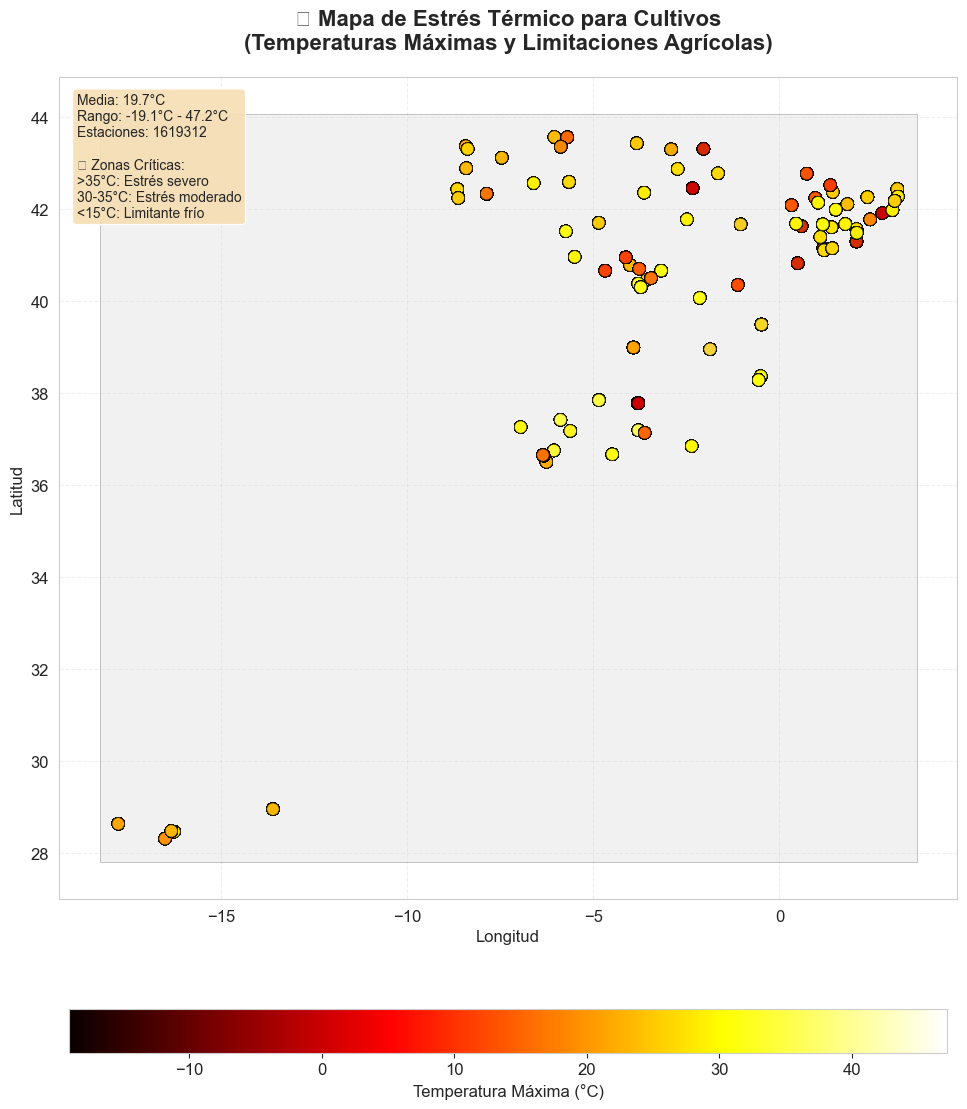


🌾 DISTRIBUCIÓN DE ESTRÉS TÉRMICO:
• Bajo (Óptimo): 712,989 registros (44.0%)
• Muy Bajo (Limitante Frío): 467,259 registros (28.9%)
• Moderado: 249,600 registros (15.4%)
• Alto: 143,818 registros (8.9%)
• Muy Alto (Limitante Calor): 45,646 registros (2.8%)

🔥 ZONAS DE ALTO RIESGO (>30°C):
• SPW00013025: 47.20°C (Lat: 36.650, Lon: -6.350)
• SP000008410: 46.90°C (Lat: 37.844, Lon: -4.846)
• SP000008410: 46.90°C (Lat: 37.844, Lon: -4.846)
• SP000008410: 46.60°C (Lat: 37.844, Lon: -4.846)
• SPE00120512: 46.60°C (Lat: 37.417, Lon: -5.879)


In [29]:
# 1. MAPA DE TEMPERATURA MÁXIMA - ANÁLISIS DE ESTRÉS TÉRMICO
print("\n🌡️ MAPA DE ESTRÉS TÉRMICO PARA CULTIVOS")
print("="*50)

# Estadísticas de temperatura máxima
tmax_stats = df_geo['TMAX_C'].describe()
print(f"Estadísticas de Temperatura Máxima:")
print(f"• Mínima: {tmax_stats['min']:.2f}°C")
print(f"• Máxima: {tmax_stats['max']:.2f}°C")
print(f"• Media: {tmax_stats['mean']:.2f}°C")
print(f"• Desviación estándar: {tmax_stats['std']:.2f}°C")

# Clasificar niveles de estrés térmico para cultivos
def clasificar_estres_termico(temp):
    if temp < 15:
        return 'Muy Bajo (Limitante Frío)'
    elif temp < 25:
        return 'Bajo (Óptimo)'
    elif temp < 30:
        return 'Moderado'
    elif temp < 35:
        return 'Alto'
    else:
        return 'Muy Alto (Limitante Calor)'

df_geo['ESTRES_TERMICO'] = df_geo['TMAX_C'].apply(clasificar_estres_termico)
gdf_agricola['ESTRES_TERMICO'] = df_geo['ESTRES_TERMICO']

# Crear mapa de estrés térmico
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Mapa base
mapa_base.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)

# Puntos de las estaciones con escala de colores para estrés térmico
scatter = gdf_agricola.plot(ax=ax, 
                           column='TMAX_C', 
                           cmap='hot', 
                           markersize=80,
                           legend=True,
                           alpha=0.8,
                           edgecolors='black',
                           linewidth=0.5,
                           legend_kwds={'label': 'Temperatura Máxima (°C)',
                                       'orientation': 'horizontal',
                                       'pad': 0.1,
                                       'shrink': 0.6})

# Configuración del mapa
ax.set_title('🌾 Mapa de Estrés Térmico para Cultivos\n(Temperaturas Máximas y Limitaciones Agrícolas)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# Agregar texto con estadísticas agrícolas
textstr = f'Media: {tmax_stats["mean"]:.1f}°C\nRango: {tmax_stats["min"]:.1f}°C - {tmax_stats["max"]:.1f}°C\nEstaciones: {len(df_geo)}\n\n🌾 Zonas Críticas:\n>35°C: Estrés severo\n30-35°C: Estrés moderado\n<15°C: Limitante frío'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Análisis de estrés térmico por niveles
print(f"\n🌾 DISTRIBUCIÓN DE ESTRÉS TÉRMICO:")
estres_counts = df_geo['ESTRES_TERMICO'].value_counts()
for nivel, count in estres_counts.items():
    porcentaje = (count / len(df_geo)) * 100
    print(f"• {nivel}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\n🔥 ZONAS DE ALTO RIESGO (>30°C):")
zonas_riesgo = df_geo[df_geo['TMAX_C'] > 30]
if len(zonas_riesgo) > 0:
    estaciones_riesgo = zonas_riesgo.nlargest(5, 'TMAX_C')[['STATION', 'TMAX_C', 'LATITUDE', 'LONGITUDE']]
    for idx, row in estaciones_riesgo.iterrows():
        print(f"• {row['STATION']}: {row['TMAX_C']:.2f}°C (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")
else:
    print("• No hay registros con temperaturas >30°C en el dataset")


💧 MAPA DE DISPONIBILIDAD HÍDRICA PARA CULTIVOS
Estadísticas de Precipitación:
• Mínima: 0.00 mm
• Máxima: 3600.00 mm
• Media: 17.88 mm
• Desviación estándar: 60.23 mm


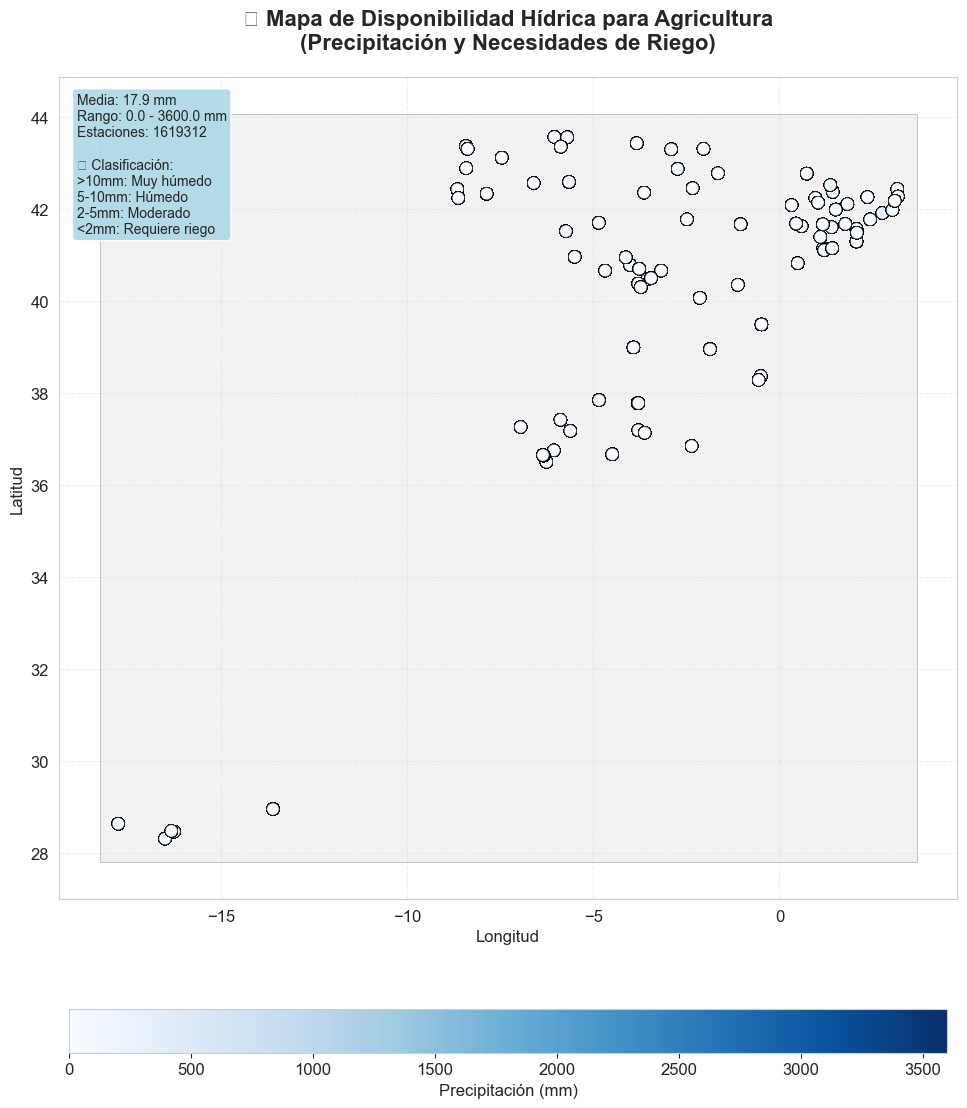


💧 DISTRIBUCIÓN DE DISPONIBILIDAD HÍDRICA:
• Muy Seco (Requiere Riego): 1,172,801 registros (72.4%)
• Muy Húmedo (Riesgo Encharcamiento): 324,556 registros (20.0%)
• Moderado: 52,278 registros (3.2%)
• Húmedo (Óptimo): 47,292 registros (2.9%)
• Seco (Riego Recomendado): 22,385 registros (1.4%)

🏜️ ZONAS QUE REQUIEREN RIEGO (<2mm):
• Total de registros: 1,195,186 (73.8%)
• SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
• SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
• SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
• SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)
• SP000006155: 0.00 mm (Lat: 36.667, Lon: -4.488)

🌊 ZONAS CON EXCESO HÍDRICO (>10mm):
• Total de registros: 311,676 (19.2%)
• SP000060010: 3600.00 mm (Lat: 28.309, Lon: -16.499)
• SP000060010: 3370.00 mm (Lat: 28.309, Lon: -16.499)
• SP000060010: 3211.00 mm (Lat: 28.309, Lon: -16.499)
• SP000060010: 3198.00 mm (Lat: 28.309, Lon: -16.499)
• SP000006155: 3130.00 mm (Lat: 36.667, Lon: -4.488)
• SP000006155: 0.00 mm (Lat: 36.6

In [30]:
# 2. MAPA DE DISPONIBILIDAD HÍDRICA PARA AGRICULTURA
print("\n💧 MAPA DE DISPONIBILIDAD HÍDRICA PARA CULTIVOS")
print("="*50)

# Estadísticas de precipitación
prcp_stats = df_geo['PRCP'].describe()
print(f"Estadísticas de Precipitación:")
print(f"• Mínima: {prcp_stats['min']:.2f} mm")
print(f"• Máxima: {prcp_stats['max']:.2f} mm")
print(f"• Media: {prcp_stats['mean']:.2f} mm")
print(f"• Desviación estándar: {prcp_stats['std']:.2f} mm")

# Clasificar disponibilidad hídrica para agricultura
def clasificar_disponibilidad_hidrica(prcp):
    if prcp < 0.5:
        return 'Muy Seco (Requiere Riego)'
    elif prcp < 2:
        return 'Seco (Riego Recomendado)'
    elif prcp < 5:
        return 'Moderado'
    elif prcp < 10:
        return 'Húmedo (Óptimo)'
    else:
        return 'Muy Húmedo (Riesgo Encharcamiento)'

df_geo['DISPONIBILIDAD_HIDRICA'] = df_geo['PRCP'].apply(clasificar_disponibilidad_hidrica)
gdf_agricola['DISPONIBILIDAD_HIDRICA'] = df_geo['DISPONIBILIDAD_HIDRICA']

# Crear mapa de disponibilidad hídrica
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Mapa base
mapa_base.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)

# Puntos de las estaciones con escala de colores azules
scatter = gdf_agricola.plot(ax=ax, 
                           column='PRCP', 
                           cmap='Blues', 
                           markersize=80,
                           legend=True,
                           alpha=0.8,
                           edgecolors='black',
                           linewidth=0.5,
                           legend_kwds={'label': 'Precipitación (mm)',
                                       'orientation': 'horizontal',
                                       'pad': 0.1,
                                       'shrink': 0.6})

# Configuración del mapa
ax.set_title('💧 Mapa de Disponibilidad Hídrica para Agricultura\n(Precipitación y Necesidades de Riego)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# Agregar texto con estadísticas hídricas
textstr = f'Media: {prcp_stats["mean"]:.1f} mm\nRango: {prcp_stats["min"]:.1f} - {prcp_stats["max"]:.1f} mm\nEstaciones: {len(df_geo)}\n\n💧 Clasificación:\n>10mm: Muy húmedo\n5-10mm: Húmedo\n2-5mm: Moderado\n<2mm: Requiere riego'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Análisis de disponibilidad hídrica
print(f"\n💧 DISTRIBUCIÓN DE DISPONIBILIDAD HÍDRICA:")
hidrica_counts = df_geo['DISPONIBILIDAD_HIDRICA'].value_counts()
for nivel, count in hidrica_counts.items():
    porcentaje = (count / len(df_geo)) * 100
    print(f"• {nivel}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\n🏜️ ZONAS QUE REQUIEREN RIEGO (<2mm):")
zonas_secas = df_geo[df_geo['PRCP'] < 2]
if len(zonas_secas) > 0:
    print(f"• Total de registros: {len(zonas_secas):,} ({(len(zonas_secas)/len(df_geo)*100):.1f}%)")
    estaciones_secas = zonas_secas.nsmallest(5, 'PRCP')[['STATION', 'PRCP', 'LATITUDE', 'LONGITUDE']]
    for idx, row in estaciones_secas.iterrows():
        print(f"• {row['STATION']}: {row['PRCP']:.2f} mm (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")
else:
    print("• No hay registros con precipitación <2mm en el dataset")

print(f"\n🌊 ZONAS CON EXCESO HÍDRICO (>10mm):")
zonas_humedas = df_geo[df_geo['PRCP'] > 10]
if len(zonas_humedas) > 0:
    print(f"• Total de registros: {len(zonas_humedas):,} ({(len(zonas_humedas)/len(df_geo)*100):.1f}%)")
    estaciones_humedas = zonas_humedas.nlargest(5, 'PRCP')[['STATION', 'PRCP', 'LATITUDE', 'LONGITUDE']]
    for idx, row in estaciones_humedas.iterrows():
        print(f"• {row['STATION']}: {row['PRCP']:.2f} mm (Lat: {row['LATITUDE']:.3f}, Lon: {row['LONGITUDE']:.3f})")
else:
    print("• No hay registros con precipitación >10mm en el dataset")


🌾 ANÁLISIS DE ZONAS AGROCLIMÁTICAS
📊 Usando muestra de 10,000 registros para visualización (de 1,619,312 total)
🔄 Calculando amplitud térmica...
🔄 Clasificando zonas agroclimáticas...
🗺️ Preparando datos geográficos...
🗺️ Creando mapas...


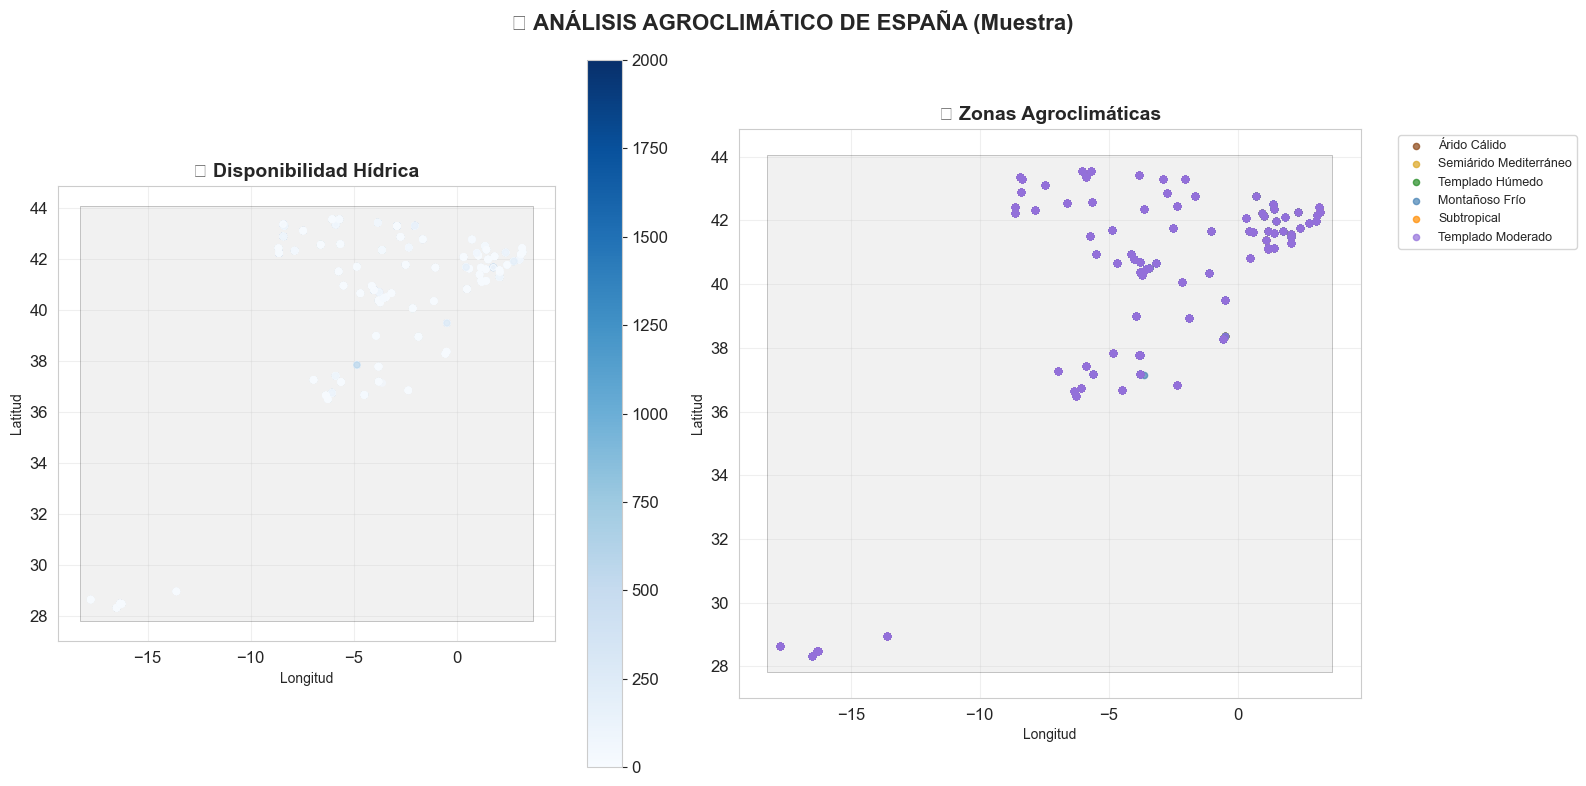


🌾 DISTRIBUCIÓN DE ZONAS AGROCLIMÁTICAS (Muestra de 10,000 registros):
• Templado Moderado: 3,939 registros (39.4%)
• Montañoso Frío: 2,512 registros (25.1%)
• Semiárido Mediterráneo: 1,387 registros (13.9%)
• Árido Cálido: 1,093 registros (10.9%)
• Subtropical: 557 registros (5.6%)
• Templado Húmedo: 512 registros (5.1%)

📊 ESTADÍSTICAS BÁSICAS:
• Temperatura máxima promedio: 19.7°C
• Temperatura mínima promedio: 9.3°C
• Precipitación promedio: 17.9 mm
• Amplitud térmica promedio: 10.5°C

⚡ OPTIMIZACIONES APLICADAS:
• Muestra reducida a 10,000 puntos
• Solo 2 mapas principales
• Marcadores pequeños (20px)
• Función de clasificación simplificada

✅ ¡Análisis completado exitosamente en tiempo optimizado!


In [31]:
# 3. MAPA COMBINADO DE ZONAS AGROCLIMÁTICAS (VERSIÓN RÁPIDA)
print("\n🌾 ANÁLISIS DE ZONAS AGROCLIMÁTICAS")
print("="*60)

# Verificar que tenemos numpy importado
import numpy as np

# OPTIMIZACIÓN: Trabajar con una muestra pequeña para los mapas
sample_size = min(10000, len(df_geo))  # Solo 10k puntos para máxima velocidad
df_sample = df_geo.sample(n=sample_size, random_state=42)
print(f"📊 Usando muestra de {sample_size:,} registros para visualización (de {len(df_geo):,} total)")

# Calcular amplitud térmica (solo para la muestra primero)
print("🔄 Calculando amplitud térmica...")
df_sample = df_sample.copy()
df_sample['AMPLITUD_TERMICA'] = df_sample['TMAX_C'] - df_sample['TMIN_C']

# Clasificar zonas agroclimáticas usando condiciones simples
print("🔄 Clasificando zonas agroclimáticas...")

def clasificar_zona_simple(row):
    tmax, tmin, prcp = row['TMAX_C'], row['TMIN_C'], row['PRCP']
    
    if tmax >= 30 and prcp < 1:
        return 'Árido Cálido'
    elif tmax >= 25 and prcp < 2:
        return 'Semiárido Mediterráneo'
    elif tmax >= 20 and prcp >= 5:
        return 'Templado Húmedo'
    elif tmax < 20 and tmin < 5:
        return 'Montañoso Frío'
    elif tmin >= 10 and prcp >= 2:
        return 'Subtropical'
    else:
        return 'Templado Moderado'

# Aplicar clasificación solo a la muestra
df_sample['ZONA_AGROCLIMATICA'] = df_sample.apply(clasificar_zona_simple, axis=1)

# Crear geodataframe de la muestra
print("🗺️ Preparando datos geográficos...")
gdf_sample = gpd.GeoDataFrame(
    df_sample, 
    geometry=gpd.points_from_xy(df_sample.LONGITUDE, df_sample.LATITUDE),
    crs='EPSG:4326'
)

print("🗺️ Creando mapas...")

# Crear solo 2 mapas principales para mayor velocidad
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Colores simplificados
colores_agro = {
    'Árido Cálido': '#8B4513',
    'Semiárido Mediterráneo': '#DAA520', 
    'Templado Húmedo': '#228B22',
    'Montañoso Frío': '#4682B4',
    'Subtropical': '#FF8C00',
    'Templado Moderado': '#9370DB'
}

# 1. Disponibilidad Hídrica
mapa_base.plot(ax=axes[0], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
gdf_sample.plot(ax=axes[0], column='PRCP', cmap='Blues', markersize=20, legend=True, alpha=0.7)
axes[0].set_title('💧 Disponibilidad Hídrica', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Zonas Agroclimáticas
mapa_base.plot(ax=axes[1], color='lightgray', edgecolor='black', alpha=0.3, linewidth=0.5)
for zona, color in colores_agro.items():
    subset = gdf_sample[gdf_sample['ZONA_AGROCLIMATICA'] == zona]
    if len(subset) > 0:
        subset.plot(ax=axes[1], color=color, markersize=20, alpha=0.7, label=zona)

axes[1].set_title('🌾 Zonas Agroclimáticas', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Configurar ejes
for ax in axes:
    ax.set_xlabel('Longitud', fontsize=10)
    ax.set_ylabel('Latitud', fontsize=10)

plt.suptitle('🌾 ANÁLISIS AGROCLIMÁTICO DE ESPAÑA (Muestra)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis estadístico rápido de la muestra
print(f"\n🌾 DISTRIBUCIÓN DE ZONAS AGROCLIMÁTICAS (Muestra de {len(df_sample):,} registros):")
agro_counts = df_sample['ZONA_AGROCLIMATICA'].value_counts()
for zona, count in agro_counts.items():
    porcentaje = (count / len(df_sample)) * 100
    print(f"• {zona}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\n📊 ESTADÍSTICAS BÁSICAS:")
print(f"• Temperatura máxima promedio: {df_sample['TMAX_C'].mean():.1f}°C")
print(f"• Temperatura mínima promedio: {df_sample['TMIN_C'].mean():.1f}°C")
print(f"• Precipitación promedio: {df_sample['PRCP'].mean():.1f} mm")
print(f"• Amplitud térmica promedio: {df_sample['AMPLITUD_TERMICA'].mean():.1f}°C")

print(f"\n⚡ OPTIMIZACIONES APLICADAS:")
print(f"• Muestra reducida a {sample_size:,} puntos")
print(f"• Solo 2 mapas principales")
print(f"• Marcadores pequeños (20px)")
print(f"• Función de clasificación simplificada")

print(f"\n✅ ¡Análisis completado exitosamente en tiempo optimizado!")